 <H3> Impact of Covid on different businesses </H3>
 
 The Entire world has been affected by the Novel Covid19 unexpectedly. Causing sickness and deaths everywhere it has spread, it has forced leaders around the world to take drastic steps to bring down it’s spread , causing lots of business to temporarily close or in case of small businesses having to permanently shut down. Objective of this data analysis is to find out how COVID 19 has effected various stocks by analyzing performance of certain stocks between January and May 2020 and predicting their values for the month of June 2020

<h4>=====Importing required libraries===

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import re
import pandas_profiling 
from matplotlib.dates import DateFormatter
%matplotlib inline

<h4> ==== Reading the data files===== </h4>

In [3]:
# Here we are reading from 2 files-One with the stock data(stock_dt.xlsx) and covid data from Datasets_Covid.xlsx =====
df1 = pd.read_excel('C:\Python_Projects\Datasets\stock_dT.xlsx')
#df2 = pd.read_excel('C:\Python_Projects\Datasets\Datasets_Covid.xlsx')

<h4> ===== Data Cleansing ==== </h4>

In [4]:
# Data is retrieved live from Yahoo Finance and is mostly clean data. 
#Some steps are taken to avoid null values

df1.fillna(0, inplace=True)
df1.drop_duplicates()

#dfA.describe()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11364 entries, 0 to 11363
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          11364 non-null  datetime64[ns]
 1   High          11364 non-null  float64       
 2   Low           11364 non-null  float64       
 3   Open          11364 non-null  float64       
 4   Close         11364 non-null  float64       
 5   Volume        11364 non-null  int64         
 6   Adj Close     11364 non-null  float64       
 7   company_name  11364 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 710.4+ KB


<h4>======== Exploratory Data Analysis ======== </h4>

 	Stock data taken from following industries:

        a.	Technology (APPLE, Microsoft, Slack)
        
        b.	Airlines (United, Delta)
        
        c.	Travel and Tourism/Hospitality (UBER, Marriot)
        
        d.	Entertainment (AMC, Six Flags, Disney, Universal Studios)
        
        e.	Retails (Macys, Dicks)
        
        f.	Hyperlocal Marketplace (Zomato)
        
        g.	Pharma (Johnson and Johnson’s)
        
  <h5> 1. Behaviour of <B>HIGH</B> values, <B>LOW</B> values, <B>OPEN</B> values, <B>CLOSE</B> values and <B> VOLUME </B> of stocks traded over time since 2017 till May 2020 </h5>
    
          a. All Stocks prices have shown a different trend around February-March of 2020 compared to previous years data.
          b. In March 2020, average Highs, Lows values have gone down for AMC, Apple, DAL, DIS, DKS, MACY’s, Marriot, Six, United, Universal Studios and Uber.
          c. In the same period, average High have gone up for GOLD, JNJ, Microsoft, Work, Zomato and remained same for platinum.
          
  <h5> 2. Trend over the last 3 years </h5>  
  
          a. AMC, Delta, United, Dicks, Macy’s, Disney, Six Flags, Marriot, Uber, Universal Studios are the most effected with their prices falling sharply from March through April and May.
          b. Apple had shown a slightly different trend, where in the past the stock prices seems to have gone up in March, in 2020 they have fallen in February, March and April moving back up in May.However values still remains high compared to last 3 years.
          c. Gold , Microsoft and Johnson’s is at highest high and keeps rising.
          d. Zomato and Slack have seen an increase in demand in the pandemic and have shown a tremendous increase in price.


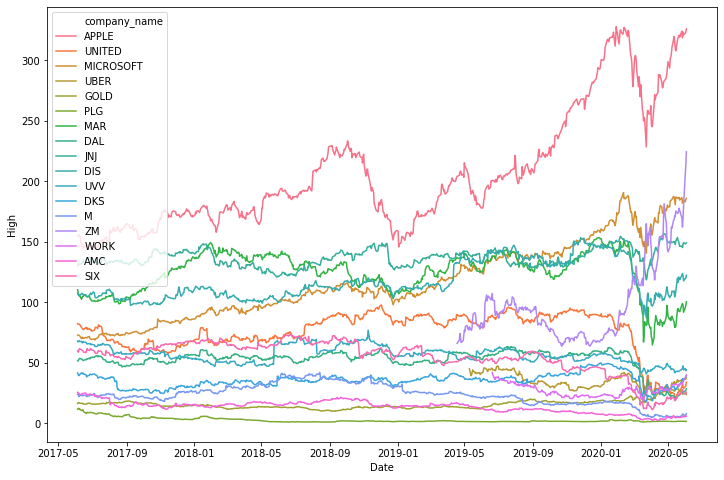

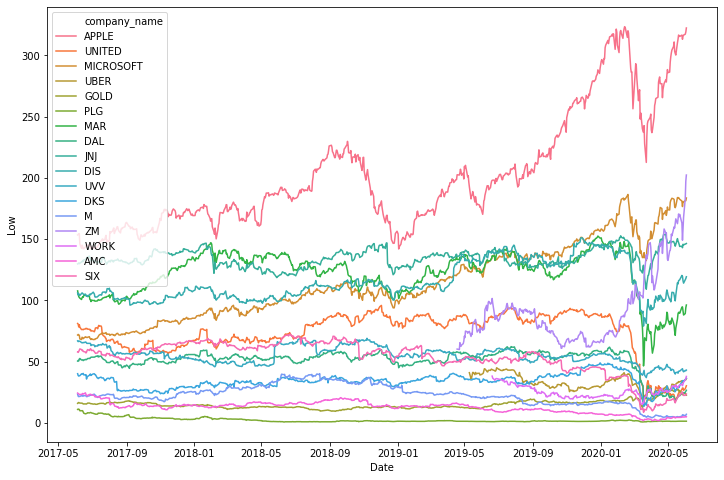

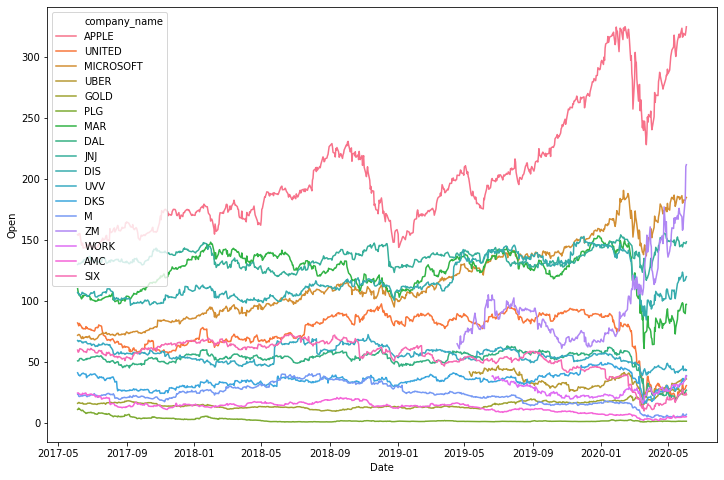

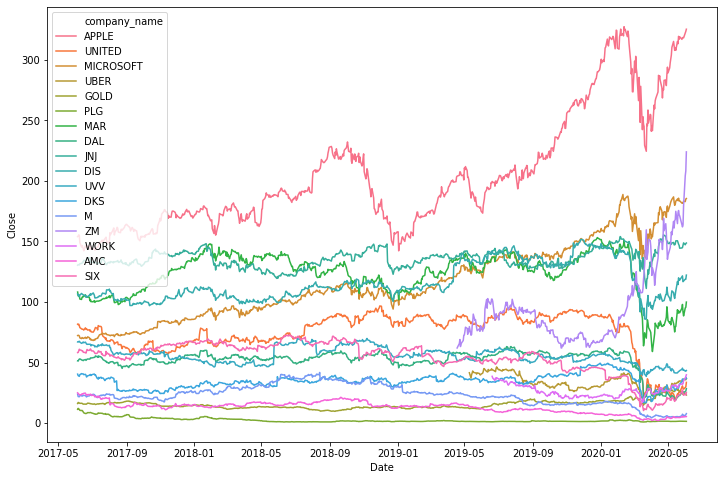

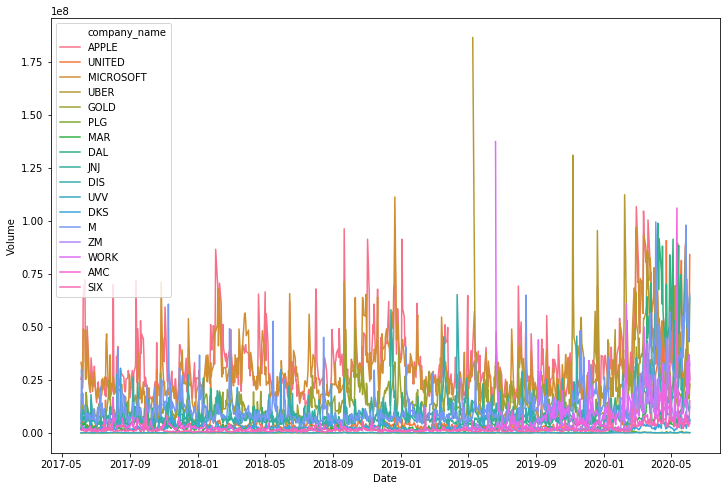

In [5]:

# Line plots showing the behavious of each stock attribute

mpl.rcParams['figure.figsize'] = (12,8)
sns.lineplot(x="Date",y="High",hue="company_name",data=df1)
plt.figure()
sns.lineplot(x="Date",y="Low",hue="company_name",data=df1)
plt.figure()
sns.lineplot(x="Date",y="Open",hue="company_name",data=df1)
plt.figure()
sns.lineplot(x="Date",y="Close",hue="company_name",data=df1)
plt.figure()
sns.lineplot(x="Date",y="Volume",hue="company_name",data=df1)

   <h5>2. Presence of Outliers  </h5>
   
    1. There is a lot of outliers present in volume for 2020 indicating more than normal buying-selling.Most outliers are present in Airlines, Technology and Retail
    2. Apple, United (Airlines), Gold, Platinum, Marriot(hotel), Delta (Airlines), Dicks (Retail),Zomato(Delivery), AMC(Entertainment), Six Flags(Entertainment) have outliers in their HIGH, LOW, OPEN and CLOSE stock values

<Figure size 864x576 with 0 Axes>

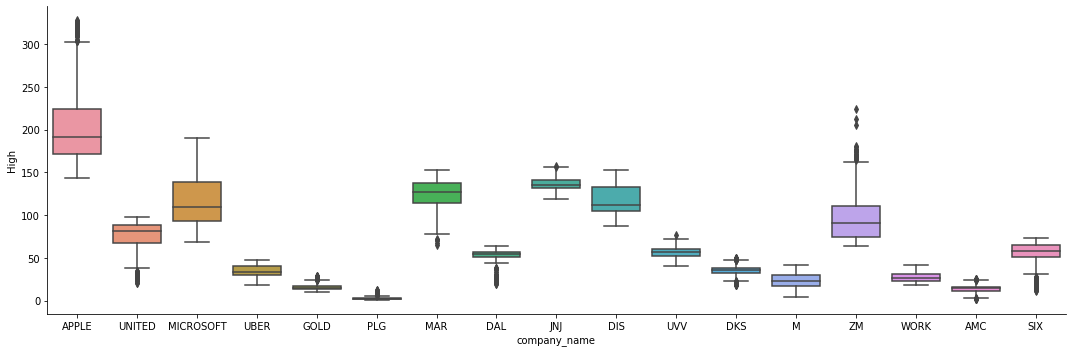

<Figure size 864x576 with 0 Axes>

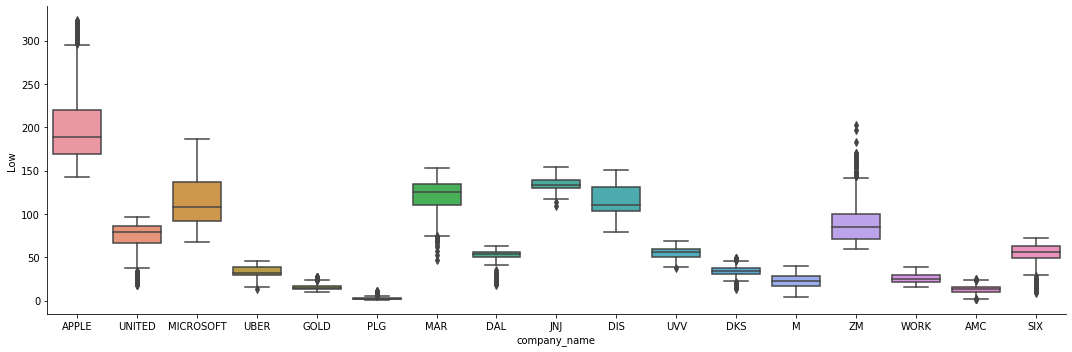

<Figure size 864x576 with 0 Axes>

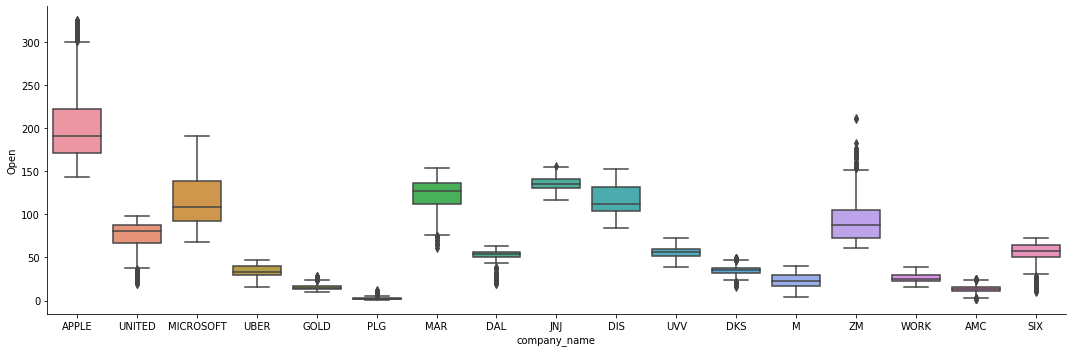

<Figure size 864x576 with 0 Axes>

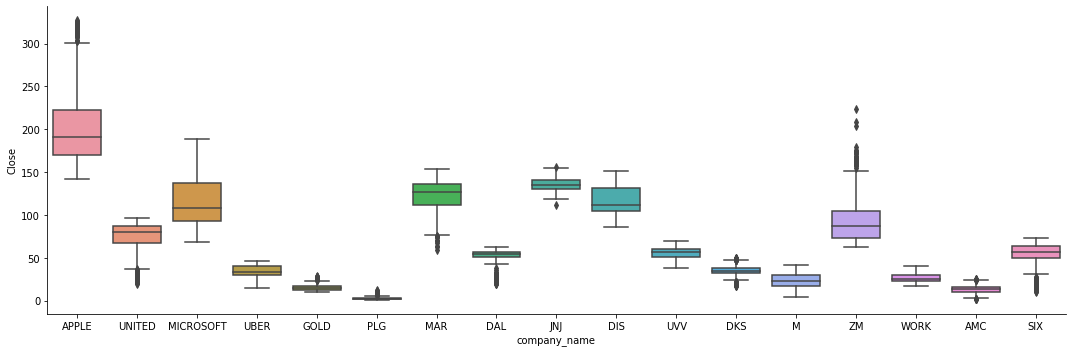

<Figure size 864x576 with 0 Axes>

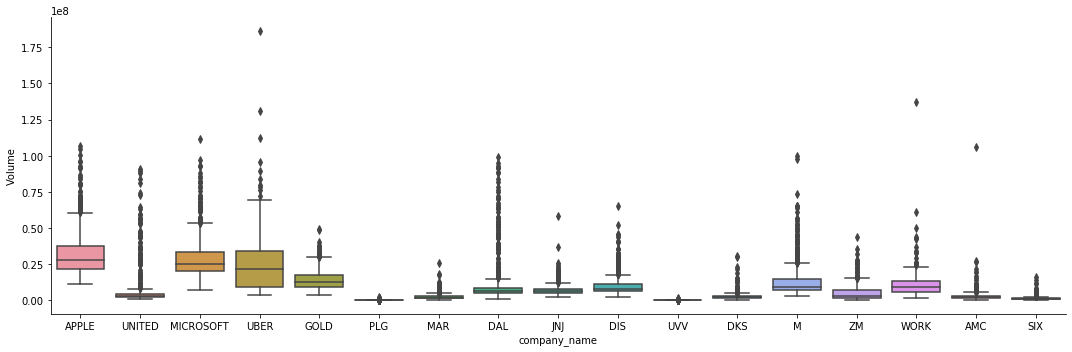

<Figure size 864x576 with 0 Axes>

In [6]:
# Boxplots for all attributes compared by Company

sns.catplot(x="company_name", y="High", data=df1,kind = 'box', height=5, aspect=3);
plt.figure()
sns.catplot(x="company_name", y="Low", data=df1,kind = 'box',  height=5, aspect=3); 
plt.figure()
sns.catplot(x="company_name", y="Open", data=df1,kind = 'box',  height=5, aspect=3);
plt.figure()
sns.catplot(x="company_name", y="Close", data=df1,kind = 'box',  height=5, aspect=3); 
plt.figure()
sns.catplot(x="company_name", y="Volume", data=df1,kind = 'box',  height=5, aspect=3); 
plt.figure()


<h4>======== Insights ======== </h4>

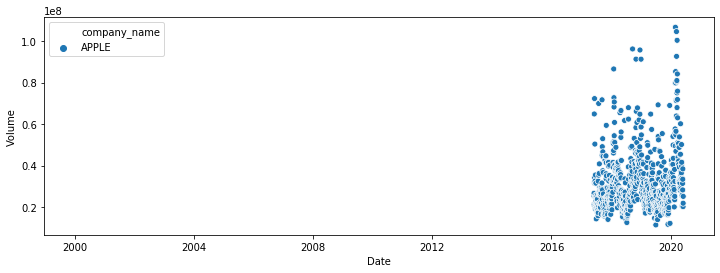

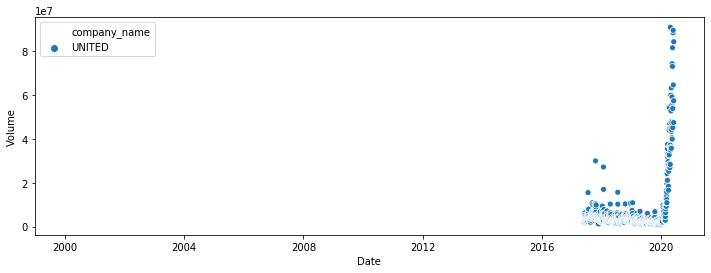

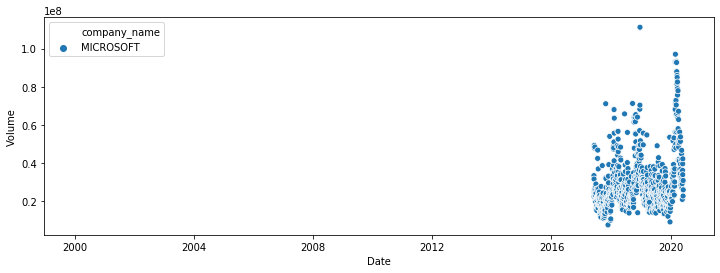

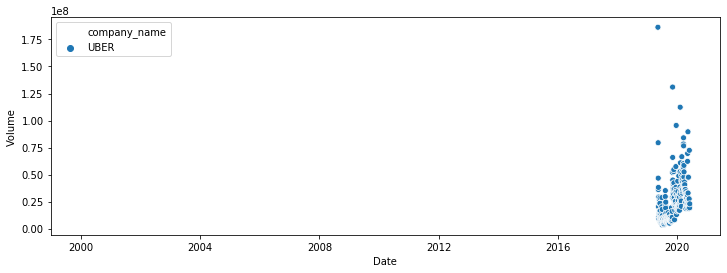

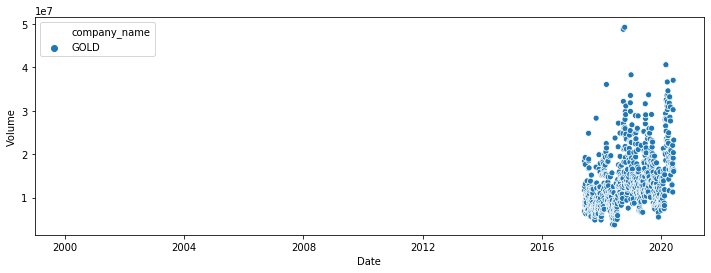

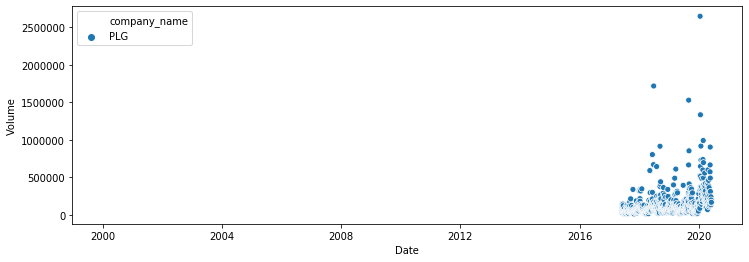

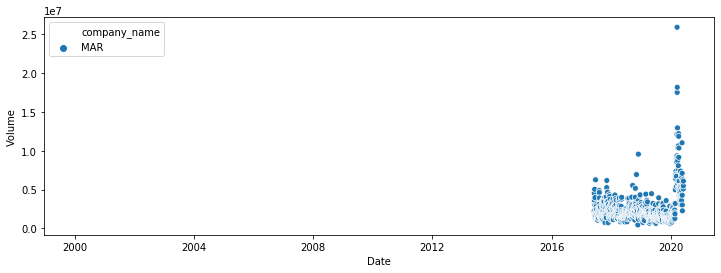

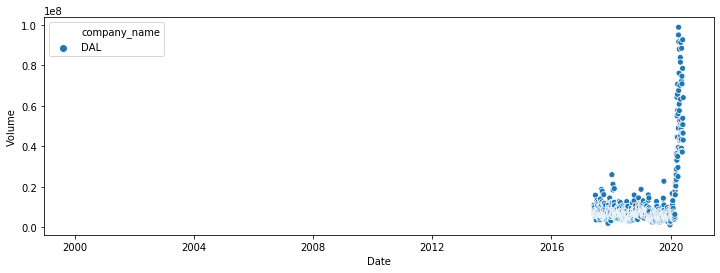

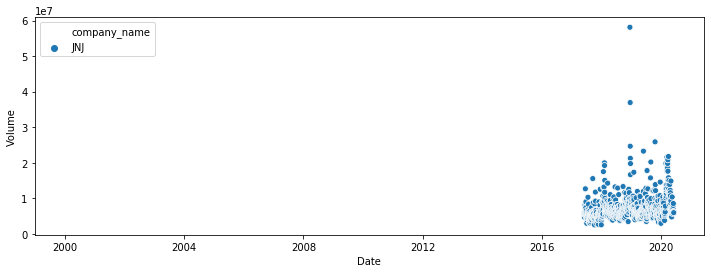

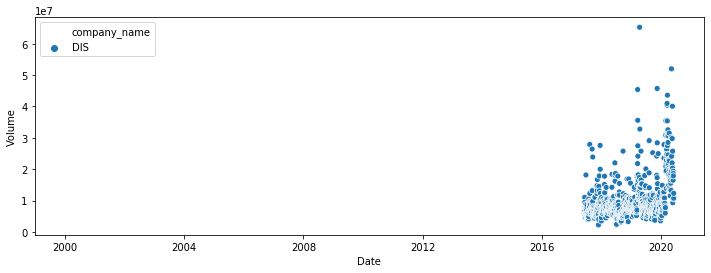

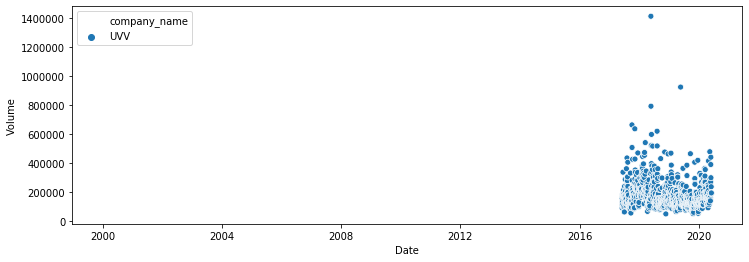

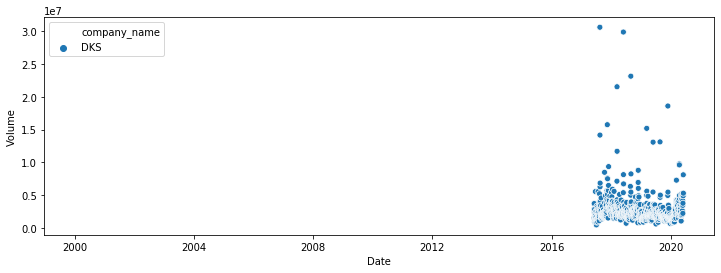

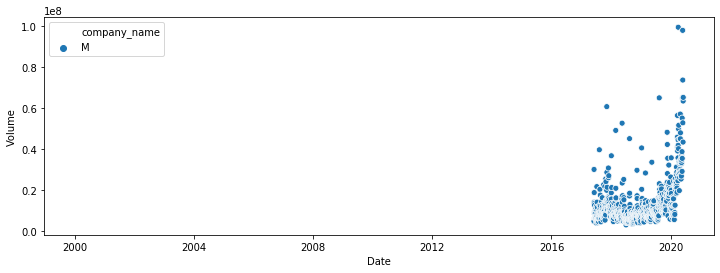

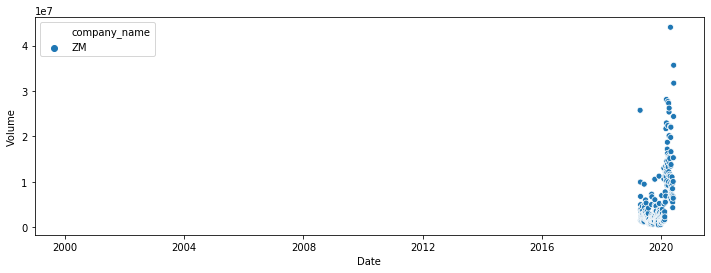

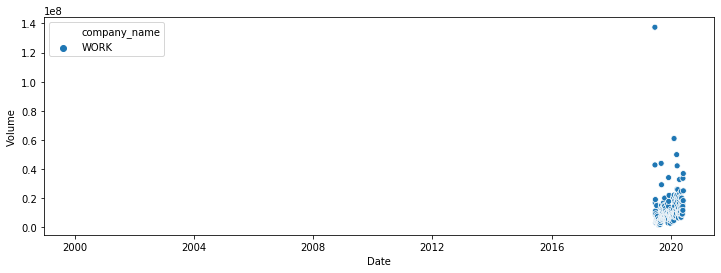

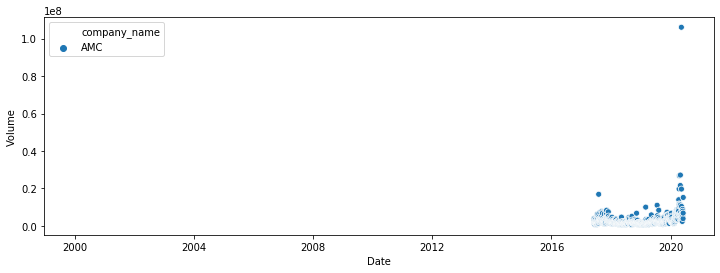

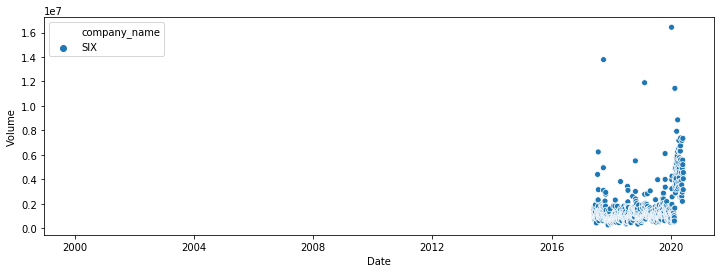

In [11]:

dfA=df1[df1['company_name'].isin(['APPLE'])]
dfU=df1[df1['company_name'].isin(['UNITED'])]
dfM=df1[df1['company_name'].isin(['MICROSOFT'])]
dfUb=df1[df1['company_name'].isin(['UBER'])]
dfG=df1[df1['company_name'].isin(['GOLD'])]
dfP=df1[df1['company_name'].isin(['PLG'])] #Platinum
dfMa=df1[df1['company_name'].isin(['MAR'])] #Marriot
dfD=df1[df1['company_name'].isin(['DAL'])] # Delta Airlines
dfJ=df1[df1['company_name'].isin(['JNJ'])] # Johnson&Johnson's
dfDi=df1[df1['company_name'].isin(['DIS'])] # Walt Disney
dfUv=df1[df1['company_name'].isin(['UVV'])] # Universal Studios
dfDk=df1[df1['company_name'].isin(['DKS'])] # Dicks Sporting Goods
dfMc=df1[df1['company_name'].isin(['M'])]  #Macy's
dfZ=df1[df1['company_name'].isin(['ZM'])] # Zomato
dfW=df1[df1['company_name'].isin(['WORK'])] # Slack
dfAm=df1[df1['company_name'].isin(['AMC'])] # AMC THeaters
dfSx=df1[df1['company_name'].isin(['SIX'])] # Six Flags Adventure Park


mpl.rcParams['figure.figsize'] = (12,4)


sns.scatterplot(x="Date", y="Volume", data=dfA, hue="company_name", color='b')
plt.show()
sns.scatterplot(x="Date", y="Volume", data=dfU, hue="company_name", color='b')
plt.show()
sns.scatterplot(x="Date", y="Volume", data=dfM, color= 'b', hue="company_name")
plt.show()
sns.scatterplot(x="Date", y="Volume", data=dfUb, color='g', hue="company_name")
plt.show()
sns.scatterplot(x="Date", y="Volume", data=dfG, color='g', hue="company_name")
plt.show()
sns.scatterplot(x="Date", y="Volume", data=dfP, hue="company_name", color='r')
plt.show()
sns.scatterplot(x="Date", y="Volume", data=dfMa, hue="company_name", color='b')
plt.show()
sns.scatterplot(x="Date", y="Volume", data=dfD, color='y', hue="company_name")
plt.show()
sns.scatterplot(x="Date", y="Volume", data=dfJ, color= 'b', hue="company_name")
plt.show()
sns.scatterplot(x="Date", y="Volume", data=dfDi, color='g', hue="company_name")
plt.show()
sns.scatterplot(x="Date", y="Volume", data=dfUv, color='g', hue="company_name")
plt.show()
sns.scatterplot(x="Date", y="Volume", data=dfDk, hue="company_name", color='r')
plt.show()
sns.scatterplot(x="Date", y="Volume", data=dfMc, hue="company_name", color='r')
plt.show()
sns.scatterplot(x="Date", y="Volume", data=dfZ, hue="company_name", color='b')
plt.show()
sns.scatterplot(x="Date", y="Volume", data=dfW, color='y', hue="company_name")
plt.show()
sns.scatterplot(x="Date", y="Volume", data=dfAm, color= 'b', hue="company_name")
plt.show()
sns.scatterplot(x="Date", y="Volume", data=dfSx, color='g', hue="company_name")
plt.show()


<h5> 1. Large Volume of Trade happened in March </h5>
    This is probably due to the fact that the S&P500, an index of stock market fell to its lowest on March 23rd due to uncertainty caused by Covid19 effect.
    This might have caused people to panic buy/sell stocks in March.
<h5> 2. United Airlines has a volume increase throughout March and unlike other stocks it is on a rise ever since </h5>
    Airlines and hospitality has been the hardest hit businesses due to Covid19 and United Airlines stock prices have since been falling.
<h5> 3. High rise in price for Slack and Zomato </h5>
     Demand for online communication and home delivery has increased due to social distancing causing a rise in stock values of these 2
 <h5> 4. Business domains effected by COVID </h5>
     Entertainment, Hospitality, Tours and Travels and Retail have taken a hard hit by COVID due to social distancing
     Gold, Platinum, Pharmacy and technology stocks remains uneffected or slightly effected

In [8]:
## Calculating the daily returns or persent returns for each
df1.shape
df1['Date'] = pd.to_datetime(df1['Date'])
df1['company_name'] = df1['company_name'].astype("string")
df1.dropna(inplace = True)
df1.drop_duplicates(keep='first', inplace=True)
df1['return'] =((df1.groupby('company_name')['Close'].shift(1).fillna(0))/(df1['Close']))-1
df1.info()
df1.head(10)
#df1.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11364 entries, 0 to 11363
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          11364 non-null  datetime64[ns]
 1   High          11364 non-null  float64       
 2   Low           11364 non-null  float64       
 3   Open          11364 non-null  float64       
 4   Close         11364 non-null  float64       
 5   Volume        11364 non-null  int64         
 6   Adj Close     11364 non-null  float64       
 7   company_name  11364 non-null  string        
 8   return        11364 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), string(1)
memory usage: 887.8 KB


,Date,High,Low,Open,Close,Volume,Adj Close,company_name,return
0,2017-06-05,154.449997,153.460007,154.339996,153.929993,25331700,147.540314,APPLE,-1.000000
1,2017-06-06,155.809998,153.779999,153.899994,154.449997,26624900,148.038742,APPLE,-0.003367
2,2017-06-07,155.979996,154.479996,155.020004,155.369995,21069600,148.920578,APPLE,-0.005921
3,2017-06-08,155.539993,154.399994,155.250000,154.990005,21250800,148.556320,APPLE,0.002452
4,2017-06-09,155.190002,146.020004,155.190002,148.979996,64882700,142.795761,APPLE,0.040341
5,2017-06-12,146.089996,142.509995,145.740005,145.419998,72307300,139.383591,APPLE,0.024481
6,2017-06-13,147.449997,145.149994,147.160004,146.589996,34165400,140.505005,APPLE,-0.007981
7,2017-06-14,147.500000,143.839996,147.500000,145.160004,31531200,139.134399,APPLE,0.009851
8,2017-06-15,144.479996,142.210007,143.320007,144.289993,32165400,138.300461,APPLE,0.006030
9,2017-06-16,144.500000,142.199997,143.779999,142.270004,50361100,136.364365,APPLE,0.014198


<Figure size 864x576 with 0 Axes>

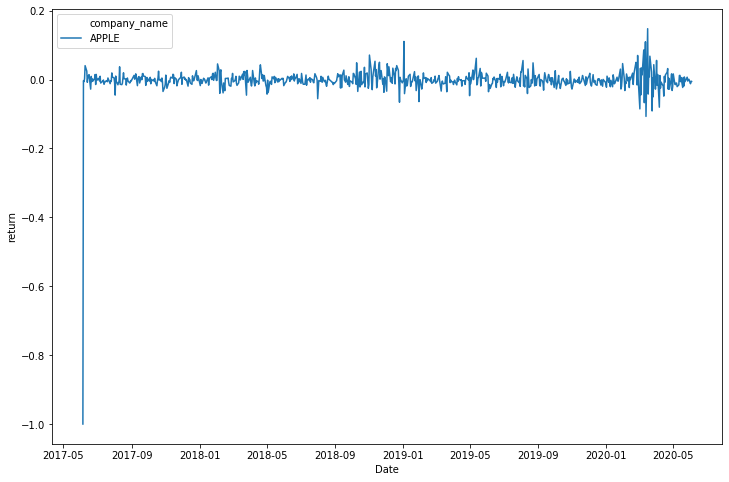

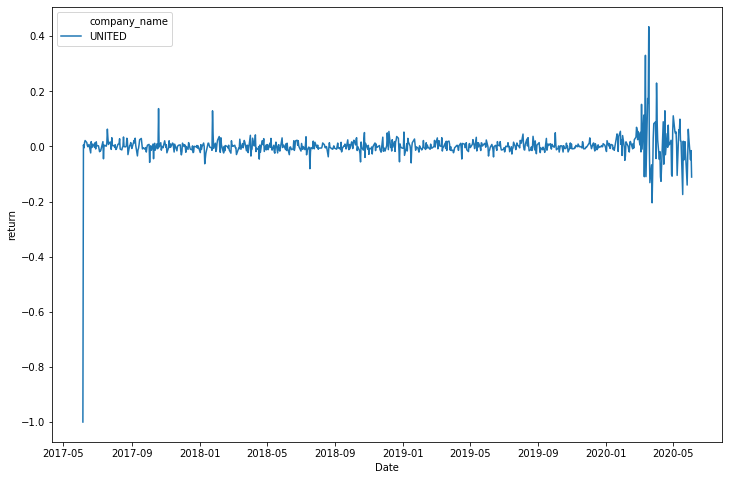

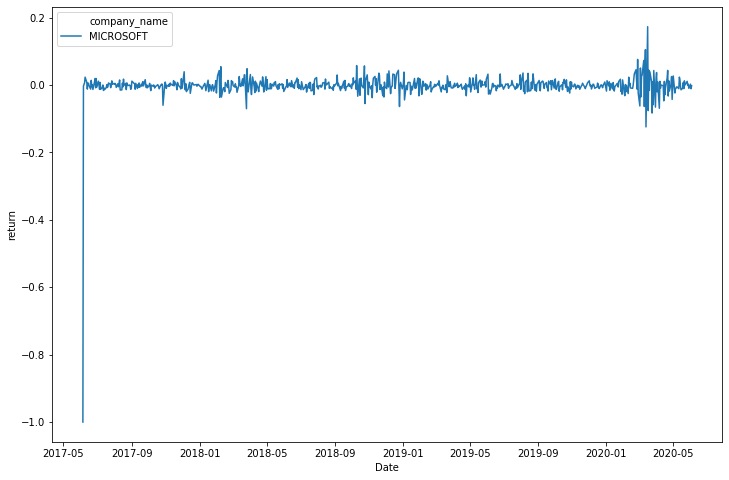

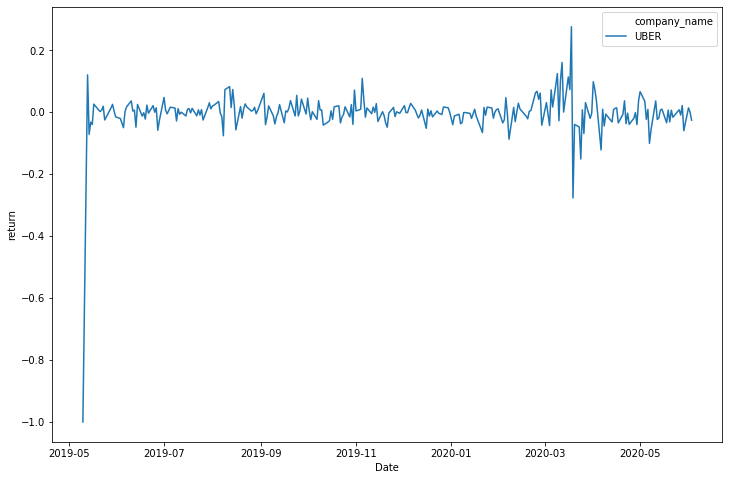

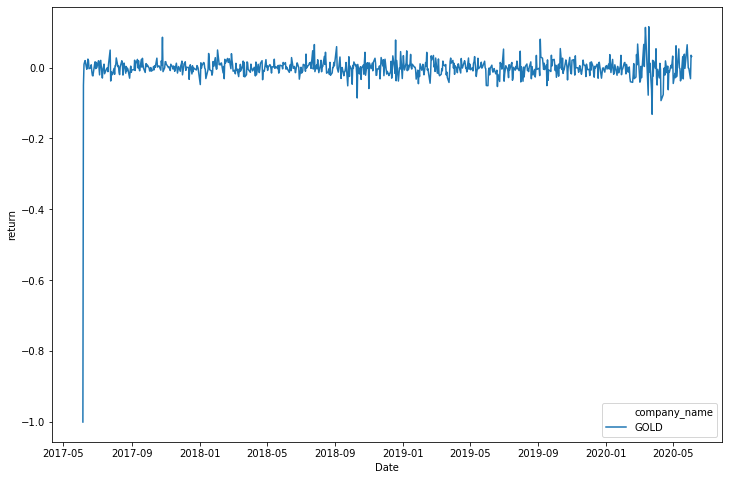

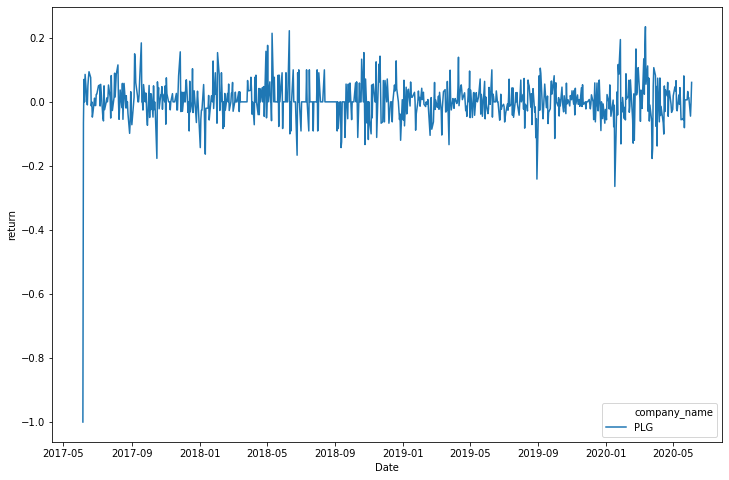

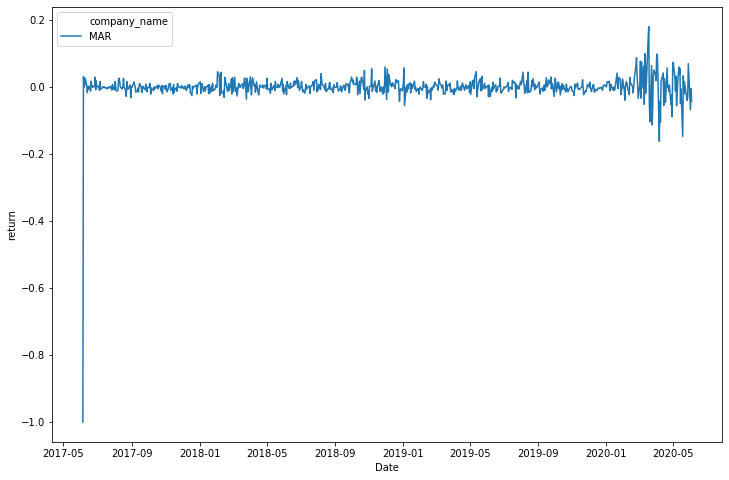

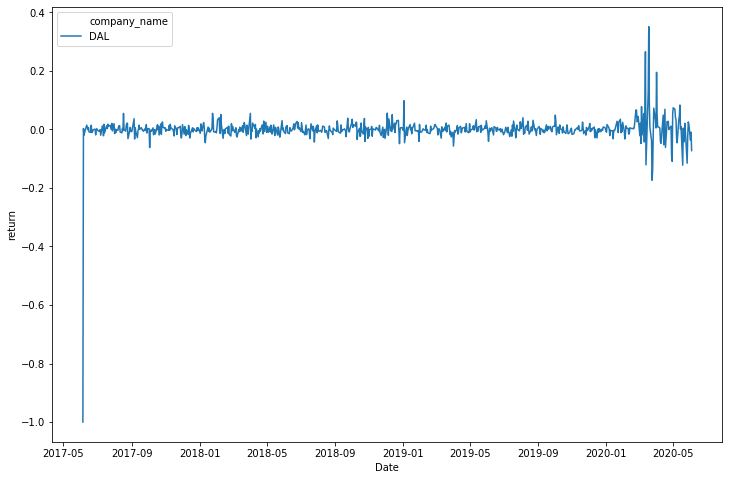

<Figure size 864x576 with 0 Axes>

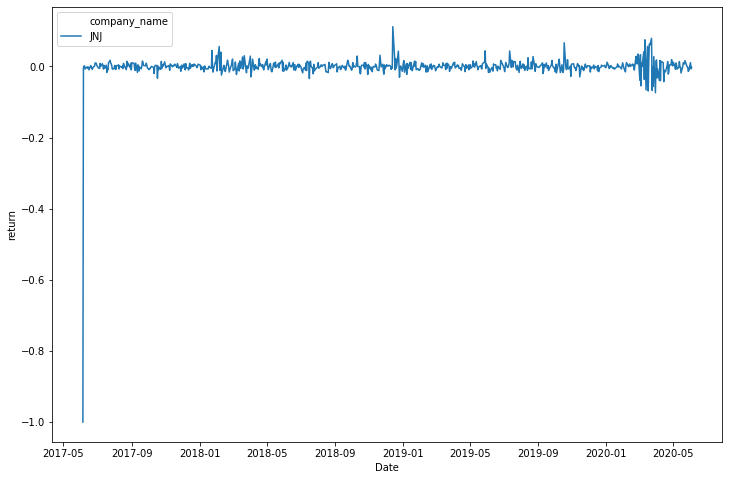

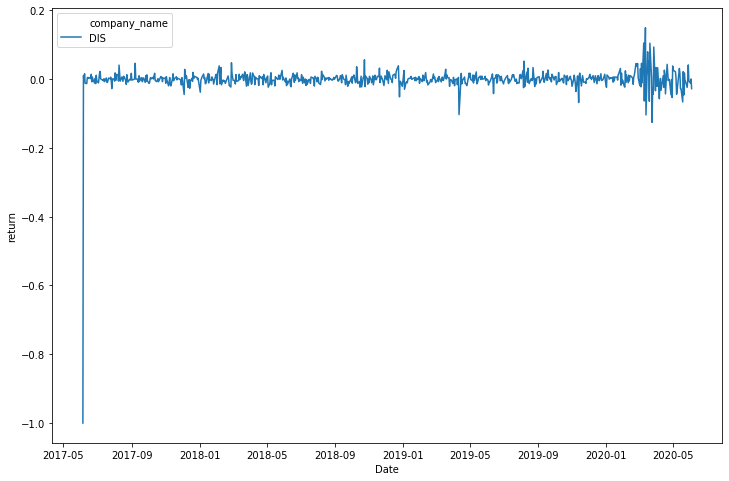

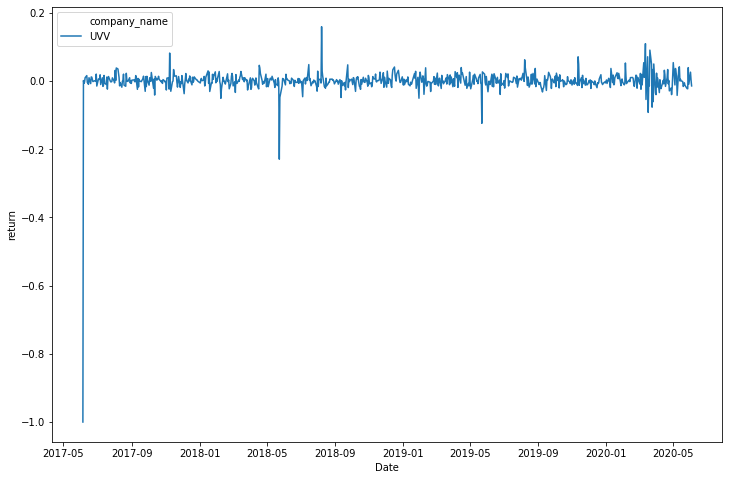

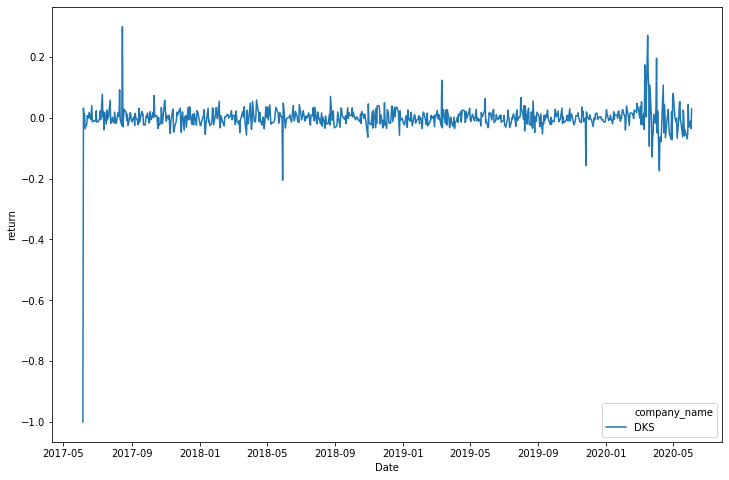

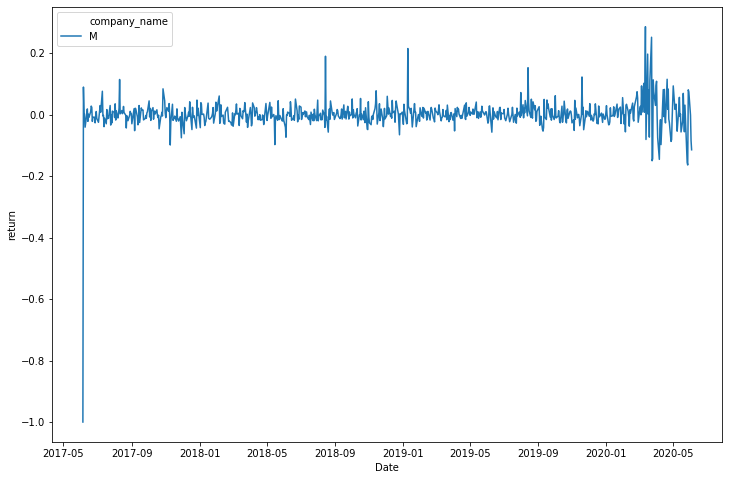

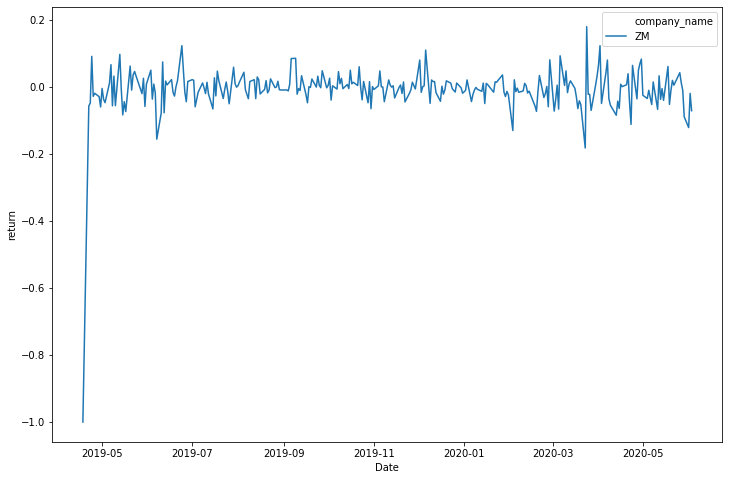

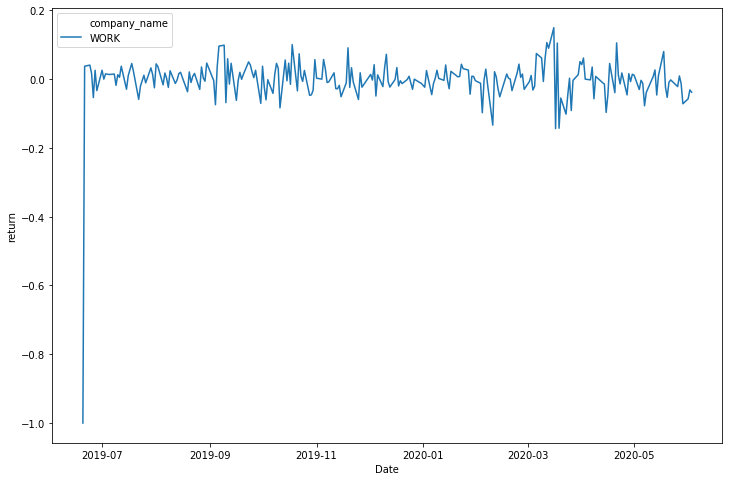

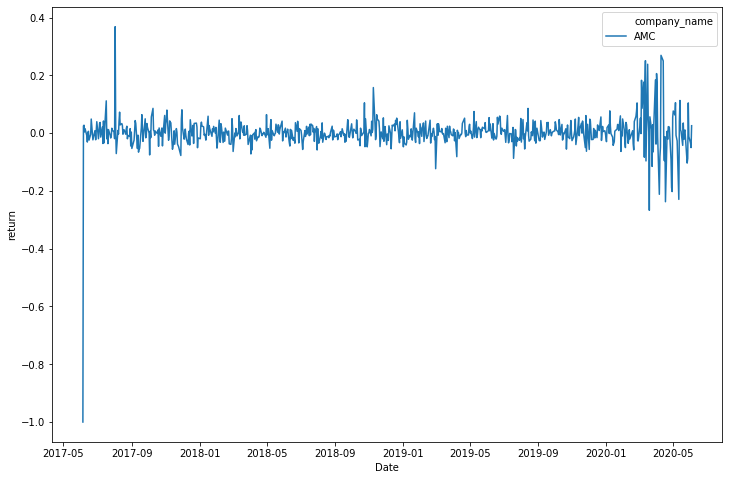

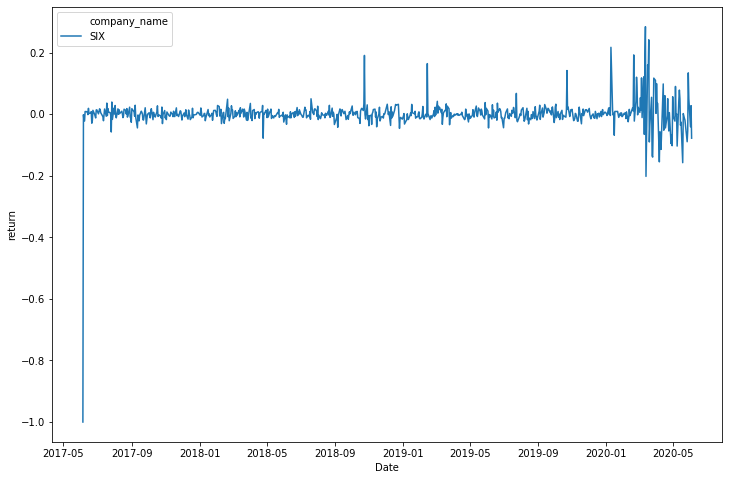

<Figure size 864x576 with 0 Axes>

In [19]:
mpl.rcParams['figure.figsize'] = (12,8)
sns.lineplot(x="Date",y="return",hue="company_name",data=dfA)
plt.figure()
sns.lineplot(x="Date",y="return",hue="company_name",data=dfU)
plt.figure()
sns.lineplot(x="Date",y="return",hue="company_name",data=dfM)
plt.figure()
sns.lineplot(x="Date",y="return",hue="company_name",data=dfUb)
plt.figure()
sns.lineplot(x="Date",y="return",hue="company_name",data=dfG)
plt.figure()
sns.lineplot(x="Date",y="return",hue="company_name",data=dfP)
plt.figure()
sns.lineplot(x="Date",y="return",hue="company_name",data=dfMa)
plt.figure()
sns.lineplot(x="Date",y="return",hue="company_name",data=dfD)
plt.figure()
plt.figure()
sns.lineplot(x="Date",y="return",hue="company_name",data=dfJ)
plt.figure()
sns.lineplot(x="Date",y="return",hue="company_name",data=dfDi)
plt.figure()
sns.lineplot(x="Date",y="return",hue="company_name",data=dfUv)
plt.figure()
sns.lineplot(x="Date",y="return",hue="company_name",data=dfDk)
plt.figure()
sns.lineplot(x="Date",y="return",hue="company_name",data=dfMc)
plt.figure()
sns.lineplot(x="Date",y="return",hue="company_name",data=dfZ)
plt.figure()
sns.lineplot(x="Date",y="return",hue="company_name",data=dfW)
plt.figure()
sns.lineplot(x="Date",y="return",hue="company_name",data=dfAm)
plt.figure()
sns.lineplot(x="Date",y="return",hue="company_name",data=dfSx)
plt.figure()

